In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [75]:
data=pd.read_csv('/content/car data.csv')

In [76]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [77]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [78]:
data[['Fuel_Type', 'Seller_Type', 'Transmission']].value_counts()

Fuel_Type  Seller_Type  Transmission
Petrol     Dealer       Manual          116
           Individual   Manual           95
Diesel     Dealer       Manual           48
Petrol     Dealer       Automatic        18
Diesel     Dealer       Automatic        11
Petrol     Individual   Automatic        10
CNG        Dealer       Manual            2
Diesel     Individual   Automatic         1
Name: count, dtype: int64

In [79]:
data=data.replace({'Fuel_Type':{'Petrol':1,'Diesel':0,'CNG':2},'Seller_Type':{'Dealer':0,'Individual':1},'Transmission':{'Manual':0,'Automatic':1}})


In [80]:
print(data)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0       ritz  2014           3.35           5.59       27000          1   
1        sx4  2013           4.75           9.54       43000          0   
2       ciaz  2017           7.25           9.85        6900          1   
3    wagon r  2011           2.85           4.15        5200          1   
4      swift  2014           4.60           6.87       42450          0   
..       ...   ...            ...            ...         ...        ...   
296     city  2016           9.50          11.60       33988          0   
297     brio  2015           4.00           5.90       60000          1   
298     city  2009           3.35          11.00       87934          1   
299     city  2017          11.50          12.50        9000          0   
300     brio  2016           5.30           5.90        5464          1   

     Seller_Type  Transmission  Owner  
0              0             0      0  
1              0   

In [81]:
x=data.drop(['Car_Name','Selling_Price'],axis=1)

In [82]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          1            0             0   
1    2013           9.54       43000          0            0             0   
2    2017           9.85        6900          1            0             0   
3    2011           4.15        5200          1            0             0   
4    2014           6.87       42450          0            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          0            0             0   
297  2015           5.90       60000          1            0             0   
298  2009          11.00       87934          1            0             0   
299  2017          12.50        9000          0            0             0   
300  2016           5.90        5464          1            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [83]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
std=scaler.transform(x)
print(std)

[[ 0.128897   -0.23621461 -0.25622446 ... -0.73728539 -0.39148015
  -0.17450057]
 [-0.21751369  0.22150462  0.1559105  ... -0.73728539 -0.39148015
  -0.17450057]
 [ 1.16812909  0.25742689 -0.77396901 ... -0.73728539 -0.39148015
  -0.17450057]
 ...
 [-1.60315648  0.39068691  1.31334003 ... -0.73728539 -0.39148015
  -0.17450057]
 [ 1.16812909  0.56450434 -0.7198763  ... -0.73728539 -0.39148015
  -0.17450057]
 [ 0.8217184  -0.20029235 -0.81095812 ... -0.73728539 -0.39148015
  -0.17450057]]


In [84]:
x=std
y=data['Selling_Price']

In [85]:
print(x)
print(y)

[[ 0.128897   -0.23621461 -0.25622446 ... -0.73728539 -0.39148015
  -0.17450057]
 [-0.21751369  0.22150462  0.1559105  ... -0.73728539 -0.39148015
  -0.17450057]
 [ 1.16812909  0.25742689 -0.77396901 ... -0.73728539 -0.39148015
  -0.17450057]
 ...
 [-1.60315648  0.39068691  1.31334003 ... -0.73728539 -0.39148015
  -0.17450057]
 [ 1.16812909  0.56450434 -0.7198763  ... -0.73728539 -0.39148015
  -0.17450057]
 [ 0.8217184  -0.20029235 -0.81095812 ... -0.73728539 -0.39148015
  -0.17450057]]
0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [89]:
print(x.shape,x_train.shape,x_test.shape)

(301, 7) (270, 7) (31, 7)


In [90]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [91]:
x_train_predict=model.predict(x_train)
x_test_predict=model.predict(x_test)

In [103]:
print(x_train_predict)
print(x_test_predict)

[ 3.53051758  4.93916076  7.15599529  1.00281086  5.65331978  6.11934823
  4.90868302  5.73268888  5.49797697 14.03896669  2.43371133  1.99255594
  1.57281975  5.62284204  5.80615678  2.06372126  5.65331978 11.24239652
  3.19726147  6.35146105  1.37794064  8.82607774  2.10325755  2.46534036
  1.46883931  1.87674941  9.6980269   1.53328346  0.76562792  8.45364034
  5.80615678  2.98771914  3.51305202  1.70444079  4.95302069  2.99167276
  2.36024343  1.94280982  2.25069311  2.11116481  4.31218482  4.50116272
  2.11116481  4.26228692  4.80839449  2.29138069  2.67092906  5.29498736
  5.0294427   4.19077361  6.01575058  3.21192469  4.11170103  2.48791084
  1.85978361  3.49608621  2.56402931  5.0294427   2.36024343  6.56035185
  7.00065247  5.18478552  2.67092906 16.8822774   3.69756952  5.05776963
  3.96756757  3.32292282  9.76293602  7.50031601  2.40998956  3.13054954
  2.12417698  2.72232624  7.77987237  2.97635801  1.72536023  4.15288837
 10.20144083  1.64118273  1.99650957  2.3765577   4

In [92]:
x_train_acc=metrics.r2_score(y_train,x_train_predict)
x_test_acc=metrics.r2_score(y_test,x_test_predict)

In [94]:
print(x_train_acc)
print(x_test_acc)

0.8824621379730492
0.8649113014244884


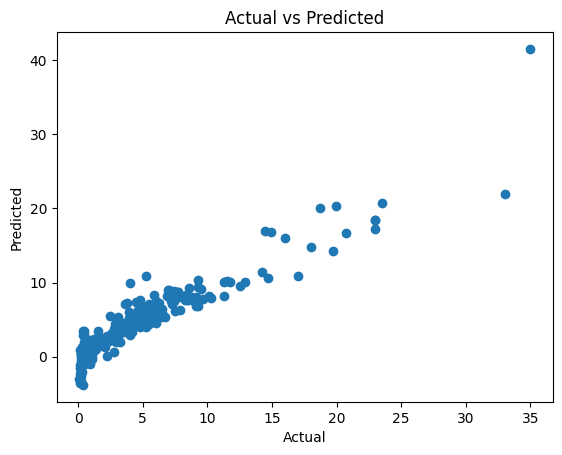

In [95]:
plt.scatter(y_train,x_train_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

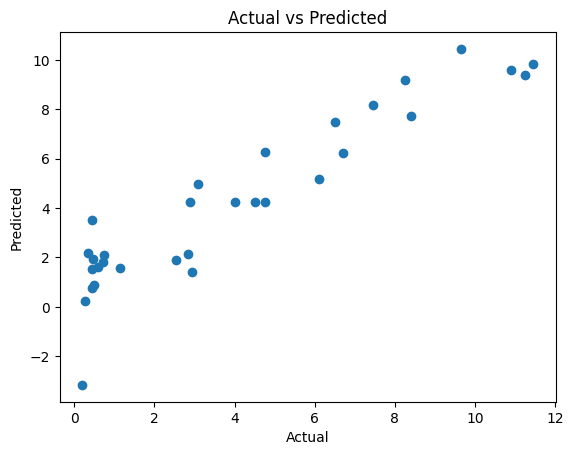

In [96]:
plt.scatter(y_test,x_test_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

**LASSO REGRESSION**

In [97]:
lasso_model=Lasso()
lasso_model.fit(x_train,y_train)

Lasso()

In [98]:
x_train_predict=lasso_model.predict(x_train)
x_test_predict=lasso_model.predict(x_test)

In [99]:
x_train_acc=metrics.r2_score(y_train,x_train_predict)
x_test_acc=metrics.r2_score(y_test,x_test_predict)

In [100]:
print(x_train_acc)
print(x_test_acc)

0.7835187452805736
0.8075562337527796


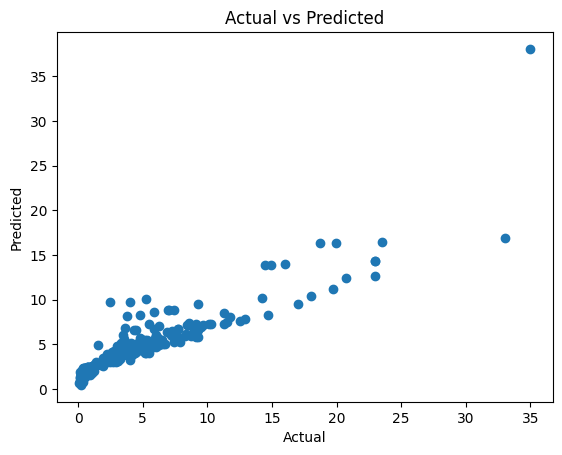

In [101]:
plt.scatter(y_train,x_train_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

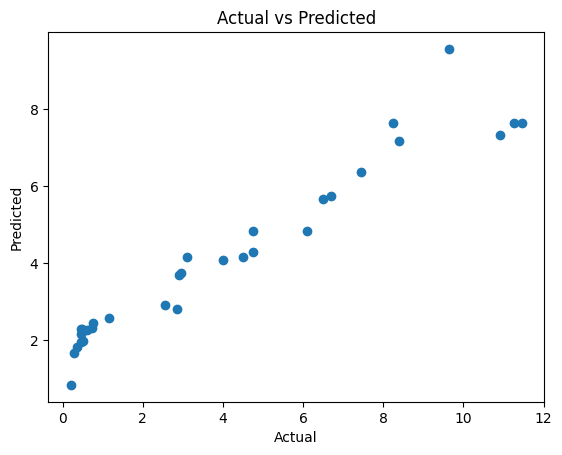

In [102]:
plt.scatter(y_test,x_test_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()